<a href="https://colab.research.google.com/github/Sharukevo/lightspector/blob/main/Spectra_From_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2190]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2191]:
import requests
url = "https://raw.githubusercontent.com/Sharukevo/lightspector/main/hydrogen4.jpg"
im = Image.open(requests.get(url, stream=True).raw)
print(im.format, im.size, im.mode)

JPEG (93, 325) RGB


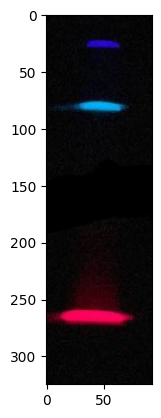

In [2192]:
imgplot = plt.imshow(im)

In [2193]:
imdata = np.array(im, dtype=int)

In [2194]:
imdatax = np.linspace(start=1, stop=im.size[1],num=im.size[1])
print(imdatax)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

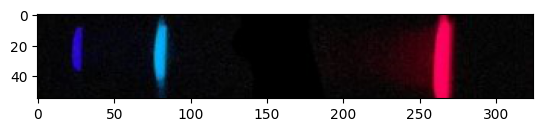

In [2195]:
imdataRot = np.rot90(imdata)
imdataRot = imdataRot[20:75:]
imgplot2 = plt.imshow(imdataRot)

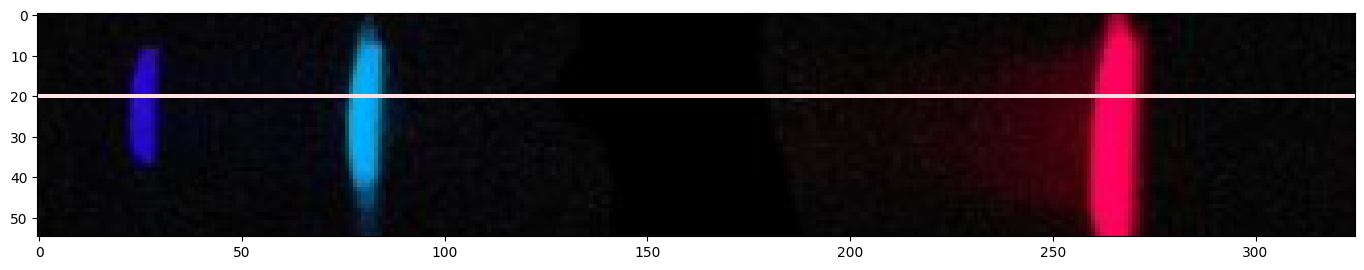

In [2196]:
LineToExtract = 20
imdataRotADDLINE = imdataRot.copy()
imdataRotADDLINE[LineToExtract,:] = [255,225,225] 
plt.figure(figsize=(17, 3))
imgplot2 = plt.imshow(imdataRotADDLINE)

In [2197]:
imdataRED = imdataRot[LineToExtract,:][:,0]
imdataGREEN = imdataRot[LineToExtract,:][:,1]
imdataBLUE = imdataRot[LineToExtract,:][:,2]
imdataAVG = (imdataRED+imdataGREEN+imdataBLUE)

In [2198]:
print(imdataGREEN)

[  8   3   3   6   6   4   6   9   6   7   7   5   5   6   5   2   6   4
   6   6   6   3   0   8  14   7   9   9  10   8   3   9   6   3   4   8
   9   8   9   9  10   9   9  10   8   5   6   8   5   4   4   7   8   7
   8   8   7   7   8   8   8   5   3   1   0   0   3   6   7   5   6   6
  10   9  11  18  47 128 173 175 179 174 165 151 113  62  33  19  20  17
  11   8   9   5   3   7   7   5   2   4   8   6   5   8  13  10   7   7
   9  11  11  11   6   2   3   8   9   7   8  12   2   6  11  12   9   6
   5   4   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   1   1   2
   6  12  11   3  14  11   9  11  10   3   3   9   4   6   3   0   4   7
   6   6   6   9   6   1   2   5   4   2   5   5   6   7   6   4   4   4
   1  10  10   9   5   1   4   2   4   8  12   8   2   2   6   5   2   5
   5   2   0   1   4   7   2   0   2   6   6   2   

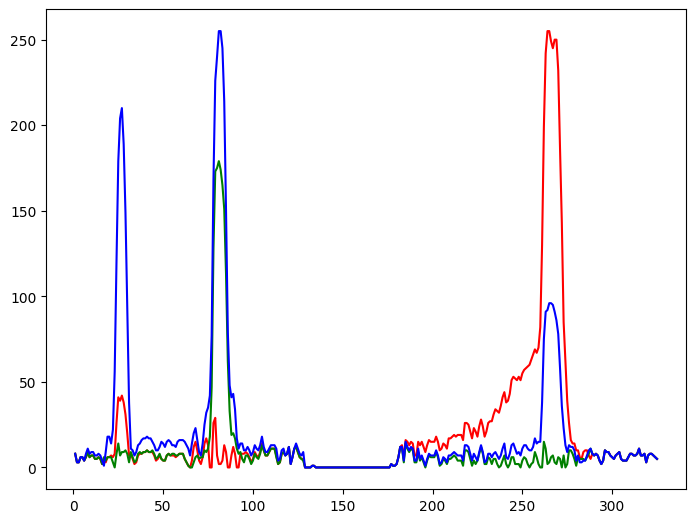

In [2199]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataRED, color='r', label='Red')
ax.plot(imdatax,imdataGREEN, color='g', label='Green')
ax.plot(imdatax,imdataBLUE, color='b', label='Blue')
plt.show()

In [2200]:
greenPeakPixels = imdataGREEN.argmax()
print(greenPeakPixels)

80


In [2201]:
redPeakPixels = imdataRED.argmax()
print(redPeakPixels)

263


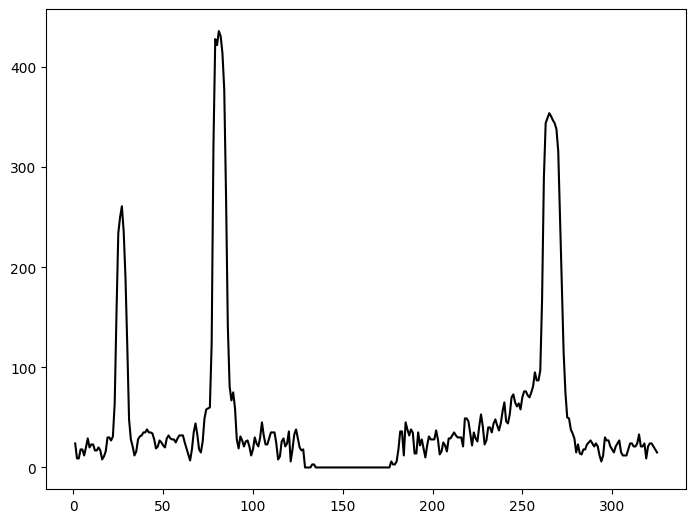

In [2202]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataAVG, color='k', label='PretendData')

plt.show()

In [2203]:
from scipy.signal import find_peaks

In [2204]:
peaks, _ = find_peaks(imdataAVG, height=100)


In [2205]:
print(peaks)

[ 26  78  80 264]


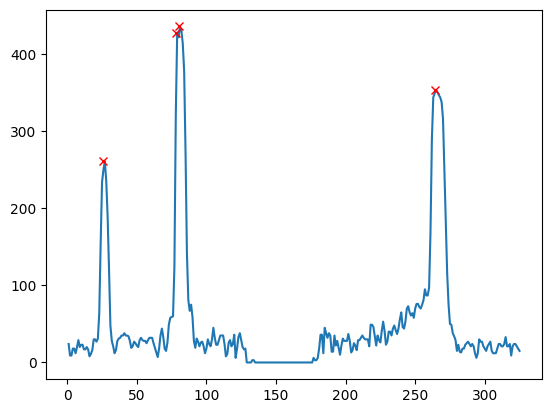

In [2206]:
plt.plot(imdatax,imdataAVG)
plt.plot(peaks, imdataAVG[peaks], "xr")

plt.show()

In [2207]:
print(peaks)

[ 26  78  80 264]


In [2208]:
print(imdatax[peaks[0]])

27.0


In [2209]:
from scipy.optimize import fsolve

In [2210]:
def func(p):
    return [300*p[0]+p[1]-620,
            550*p[0]+p[1]-750]

params = fsolve(func, [1, 1])

print(params[0])
print(params[1])

0.5200000000000001
463.99999999999994


In [2211]:
300*params[0]+params[1]

620.0

In [2212]:
550*params[0]+params[1]

750.0

In [2213]:
imdataxInWavelength = imdatax*params[0]+params[1]

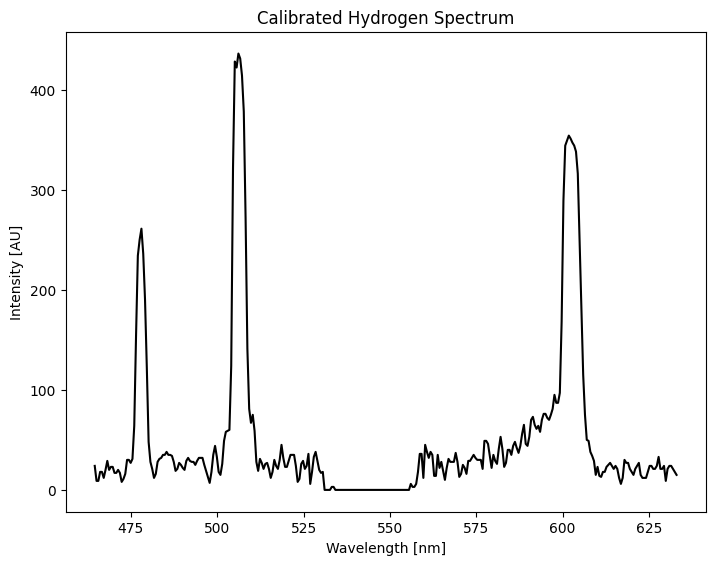

In [2214]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdataxInWavelength,imdataAVG, color='k', label='PretendData')


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Intensity [AU]')
ax.set_title('Calibrated Hydrogen Spectrum')
plt.show()